#### Norms tests and plots

* Function to plot unit circle, out of  6: 6
* Function(s) to test
  * $\|x\| \ge 0$ out of 2: 2
  * $\|x\|=0 \Leftrightarrow x=0$, out of  2: 2
  * $\|ax\|=|a|\|x\|$, out of  3: 3
  * $\|u+v\| \le \|u\|+\|v\|$, out of 3: 3
* Code comments and Docstrings, out of 3: 3
* Tests and plot for 
  *  $\|\cdot\|_1$, out of 2: 2
  * $\|\cdot\|_{4/3}$,  out of 2: 2
  * $\|\cdot\|_2$,  out of 2: 2
  * $\|\cdot\|_4$,  out of 2: 2
  * $\|\cdot\|_{\infty}$, out of 2: 2
  * $\|\cdot\|_1+\|\cdot\|_{\infty}$, out of 2: 2
  * $f(\mathbf{x})=2|x_1|+|x_2|$,   out of 2: 2
  * $f(\mathbf{x})=2|x_1|-|x_2|$,  out of 2: 2
  * another function of your choice, out of 2: 2
* Interpretation(s) of the results,  out of 3: 3
  
Total, out of  40: 40

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def func_1(v):
    return 2*abs(v[0])+abs(v[1])

def func_2(v):
    return 2*abs(v[0])-abs(v[1])

def func_3(v):
    return 3*abs(v[0])+4*abs(v[1])

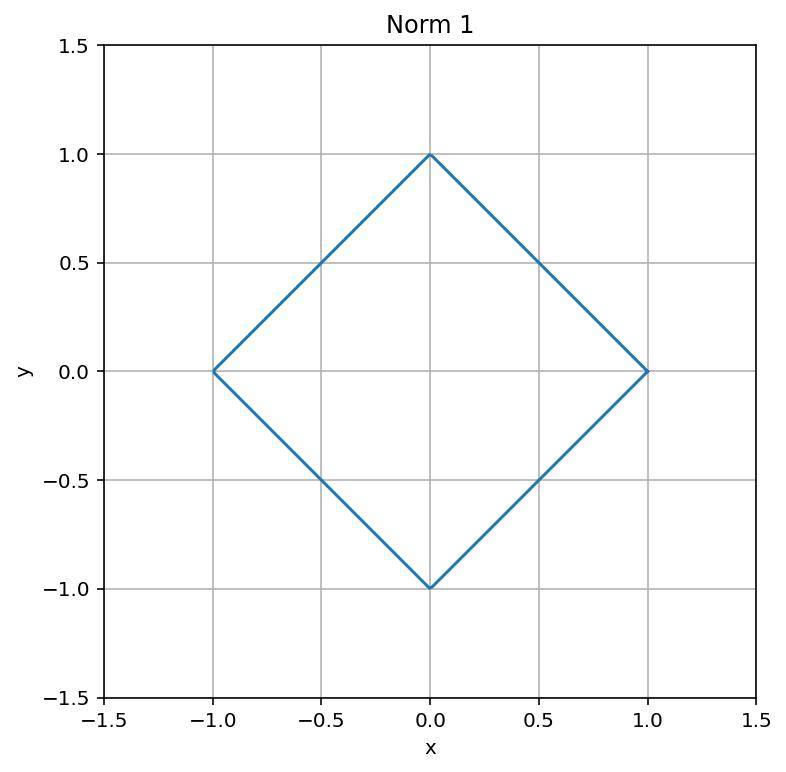

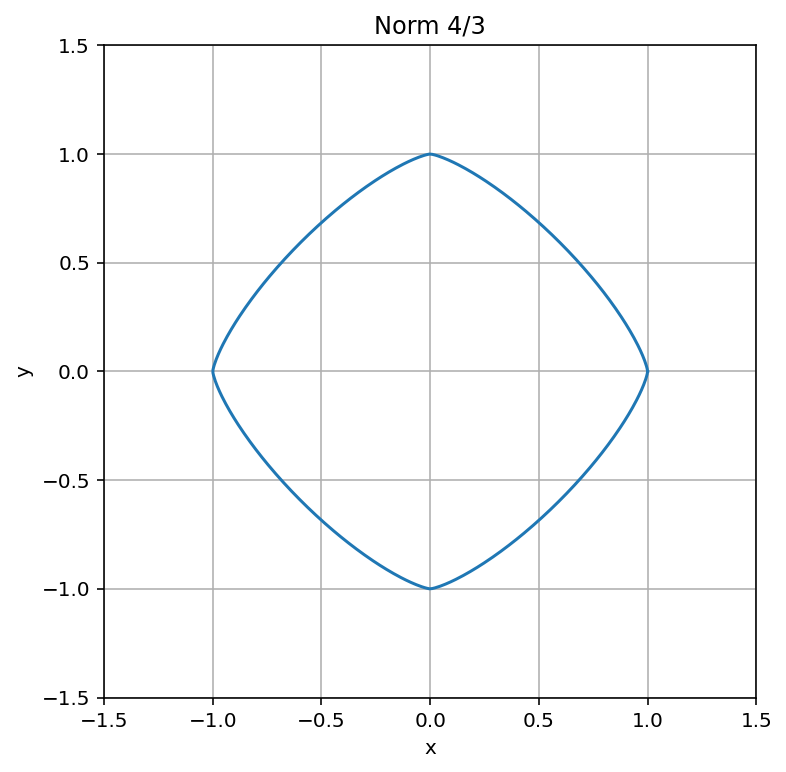

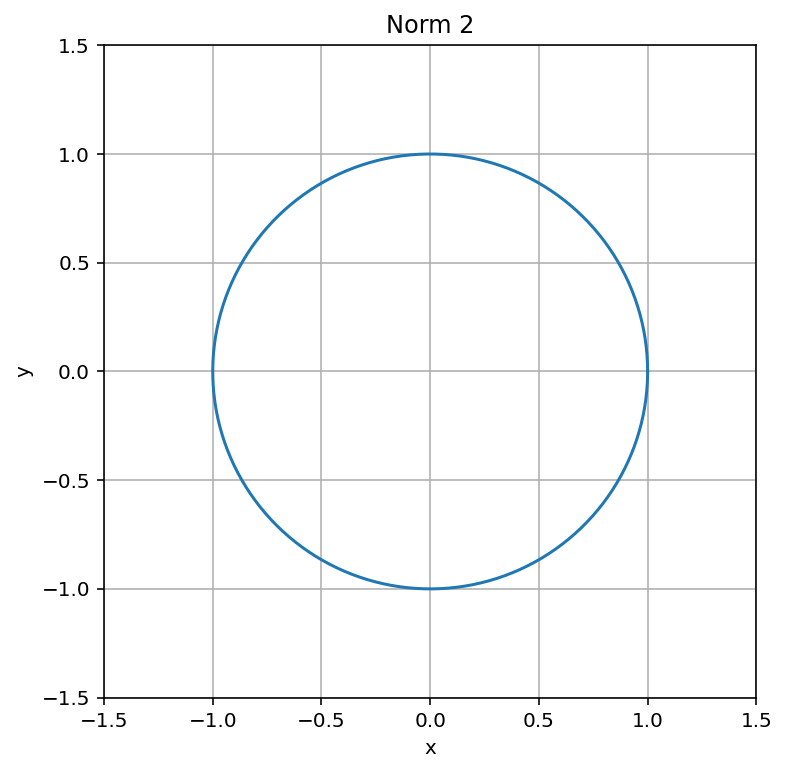

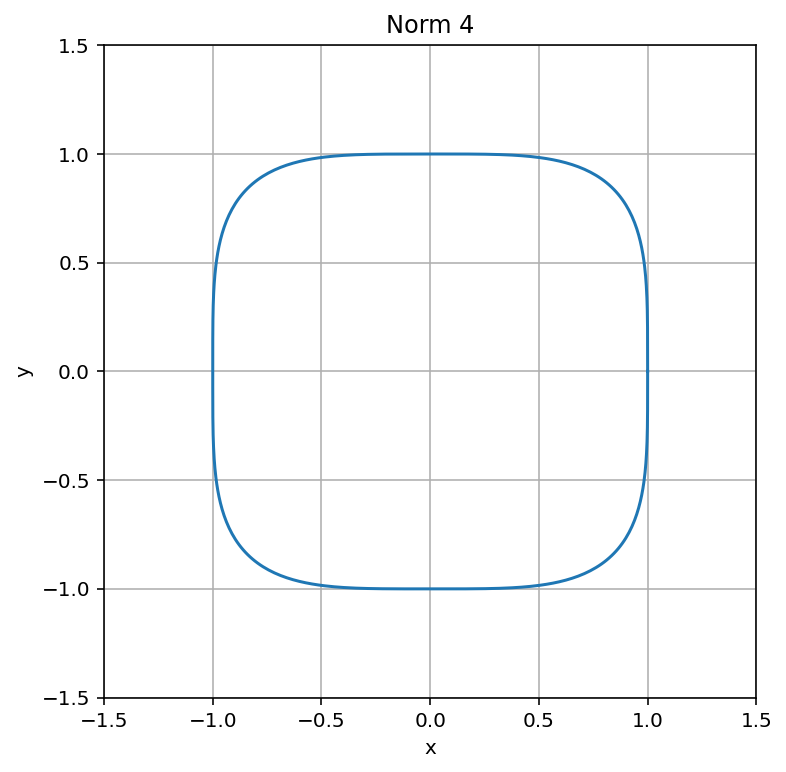

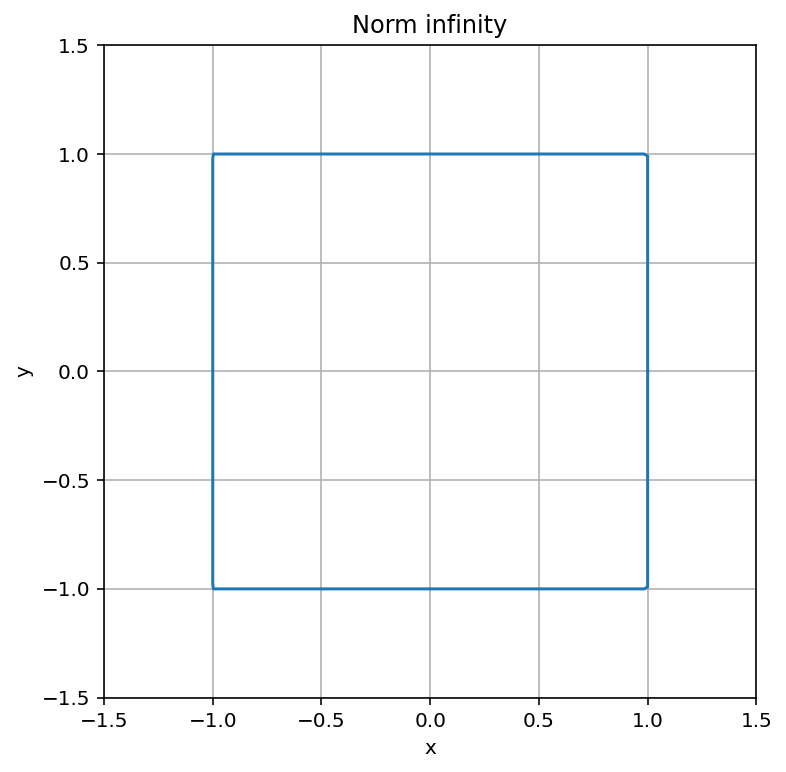

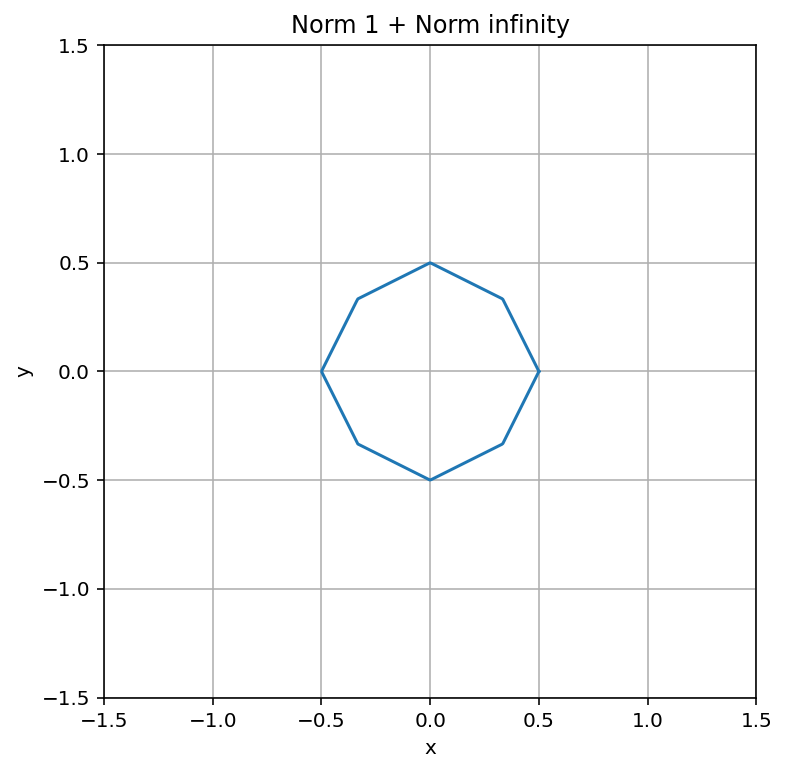

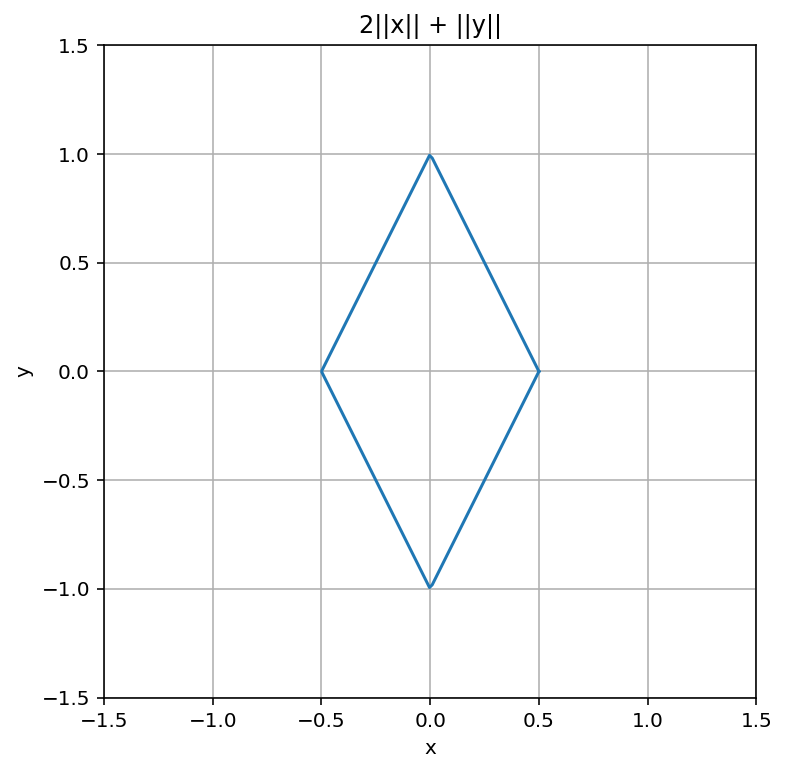

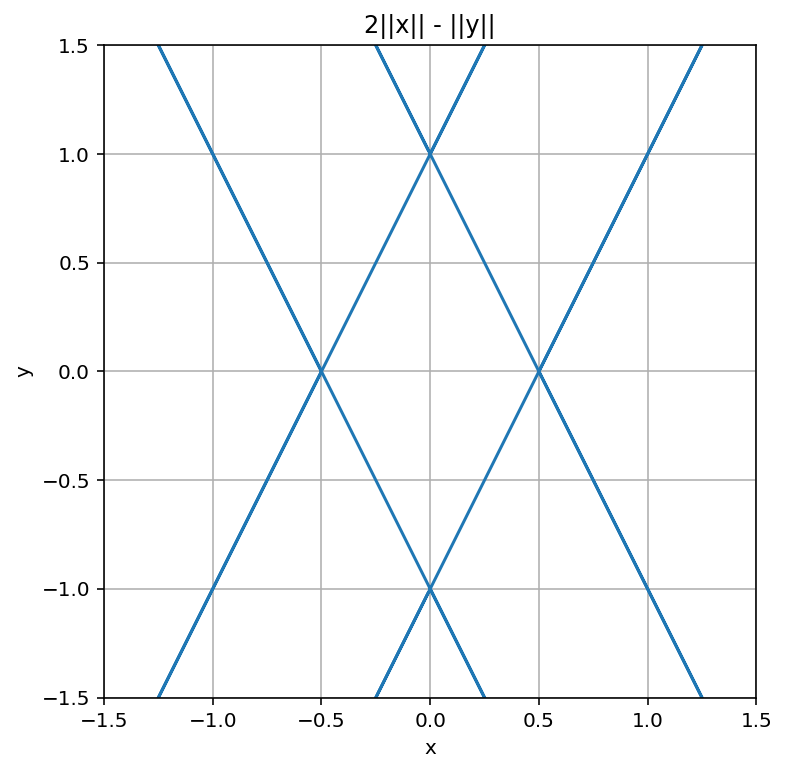

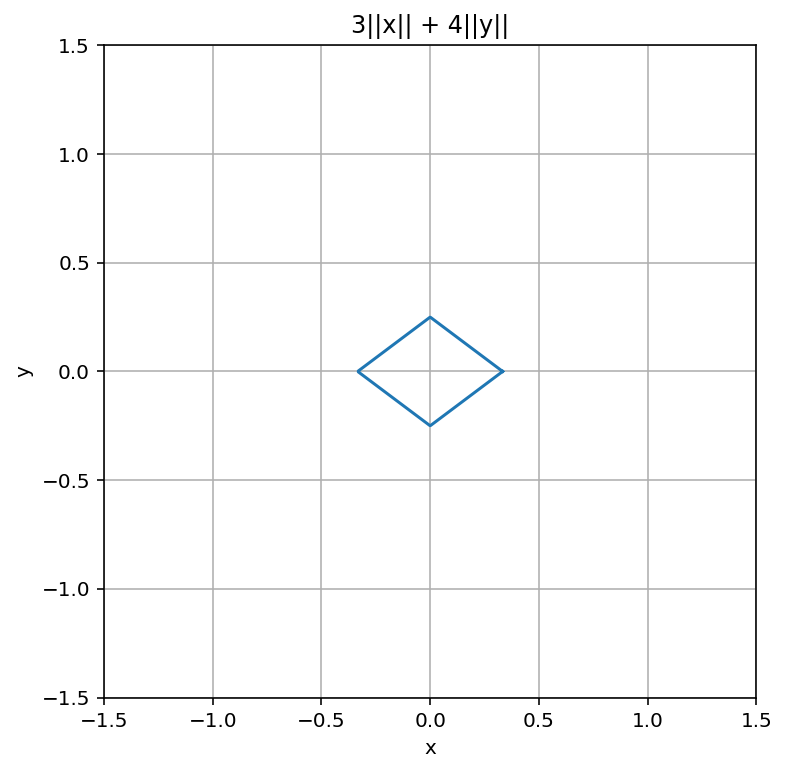

In [33]:
def plot_unit_circle(norm_func, title, num_points=500):
    """
    Inputs:
    - norm_func: A function that calculates the norm of a 2D vector.
    - title: Title of the plot.
    - num_points: Number of points to use for plotting the circle.
    
    Output:
    - Gives you all you need to plot the unit 'circle' for a given norm.
    """
    theta = np.linspace(0, 2*np.pi, num_points)
    unit_circle = np.array([[np.cos(t), np.sin(t)] for t in theta])

    # Scale each point so that its norm is 1
    scaled_circle = np.array([u / norm_func(u) for u in unit_circle])
    #print(scaled_circle)
    plt.figure(figsize=(6,6))
    plt.plot(scaled_circle[:, 0], scaled_circle[:, 1])
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

plot_unit_circle(lambda x: np.linalg.norm(x, ord=1), title="Norm 1")
plot_unit_circle(lambda x: np.linalg.norm(x, ord=4/3), title= "Norm 4/3")
plot_unit_circle(lambda x: np.linalg.norm(x, ord=2), title="Norm 2")
plot_unit_circle(lambda x: np.linalg.norm(x, ord=4), title="Norm 4")
plot_unit_circle(lambda x: np.linalg.norm(x, ord=np.inf), title="Norm infinity")
plot_unit_circle(lambda x: np.linalg.norm(x, ord=1) + np.linalg.norm(x, ord=np.inf), title="Norm 1 + Norm infinity")
plot_unit_circle(func_1, title="2||x|| + ||y||")
plot_unit_circle(func_2, title="2||x|| - ||y||")
plot_unit_circle(func_3, title="3||x|| + 4||y||")


In [34]:
def is_norm(candidate_norm):
    """
    Checks if a given function is a norm.
    """
    
    # Tolerance set to be 10^-6
    tolerance=1e-6
    # Test a range of vectors and scalars
    for _ in range(1000):
        x = np.random.randn(2)
        y = np.random.randn(2)
        alpha = np.random.randn()

        # Non-negativity
        if candidate_norm(x) < 0 or (candidate_norm(x) == 0 and np.any(x != 0)):
            return False

        # Scalability
        # ||a.x|| = ||a||.||x||
        if not np.isclose(candidate_norm(alpha * x), np.abs(alpha) * candidate_norm(x), atol=tolerance):
            return False

        # Triangle inequality
        if candidate_norm(x + y) > candidate_norm(x) + candidate_norm(y) + tolerance:
            return False

    return True

# Checks
print(is_norm(lambda x: np.linalg.norm(x, ord=1)))
print(is_norm(lambda x: np.linalg.norm(x, ord=4/3)))
print(is_norm(lambda x: np.linalg.norm(x, ord=2)))
print(is_norm(lambda x: np.linalg.norm(x, ord=4)))
print(is_norm(lambda x: np.linalg.norm(x, ord=np.inf)))
print(is_norm(lambda x: np.linalg.norm(x, ord=1) + np.linalg.norm(x, ord=np.inf)))
# Check if func_1 is a norm
print(is_norm(func_1))
# Check if func_2 is a norm
print(is_norm(func_2))
# Check if func_3 is a norm
print(is_norm(func_3))


True
True


True
True


True
True


True
False
True


## Interpretation

- Manhattan Norm (L1): The plot should look like a diamond. This is because the Manhattan norm sums the absolute values of the vector components.
- Custom Norms (L4/3 and L4): L4 nrom will result in a shape that is somewhat square-like but with rounded corners. L4/3 norm will produce a shape that is more diamond-like, with flattened regions along the axes.
- Euclidean Norm(L2):This would show a circle shape, as it measures the standard Euclidean distance.
- Infinity Norm(Linf):The plot should form a square, as the infinity norm takes the maximum absolute value of the vector components.
- Function 1 (2||x|| + ||y||):The shape will be elongated along the x-axis. It is also passed all the tests, so this is a norm.
- Function 2 (2||x|| - ||y||): The shape is a little unusuall. It seems that it is not a norm as it failed my tests.
- Function 3 (3||x|| + 4||y||): This shape will be diamond-like but with more pronounced distortion. It is a norm as it passed my tests.
